# Artifical Neural Network  
---

## Lab Objective  
  
To understand the fundamentals of artificial neural network and its capabilities.  
  
The contents in this lab course:
1. Limitations of linear model
2. Introduction to artificial neural network
3. Introduction to PyTorch
4. Non-linear model
  
## Introduction  
In our previous lab, we covered the mechanics of gradient descent and how to apply it to learn the coefficients for linear regression.  
In this lab, we will be explaining the limitations of linear models and utilizing gradient descent to optimize and learn a type of non-linear models called artificial neural network.   

---

## Limitations of linear model
Linear models are great for modelling the relationship between independent variables and dependent variables.  
However, the usage of linear models requires a very strong assumption of a linear relationship between the independent variables and the dependent variable.  
In cases where our assumption of linear relationship is false, naive application of linear model will not enable us to effectively predict the expected value of a dependent variable.  
  
Consider an example scenario where u have to pack <b>cube-shaped carton boxes</b> into a large <b>cube-shaped crate.</b>  
For each shipment, there is variable $x_1$, $x_2$ that linearly determines the size for the sides $S(x_1, x_2)$ of the carton boxes.
$$S(x_1, x_2) = a_1x_1 + a_2x_2 + b$$  
With prior knowledge, we know that the volume of a cube is $x^3$ if the side of the cube is $x$.  
Therefore, the number of crate needed to fit $n$ number of carton boxes is $\frac{nx_{carton}^3}{x_{crate}^3}$.
  
  
For the exercise below, let us assume we do not have prior knowledge and we are tasked to predict the <b>number of crates needed to store 100 carton boxes</b> given $x_1$, $x_2$ and a fixed size crate of <b>1 unit</b> on each side.
Train a linear model $F(x_1, x_2)$ such that $F(x1, x2) \approx \frac{100S(x_1, x_2)^3}{1^3} = 100S(x_1, x_2)^3$

<img src="img/carton-example.png" width="600">

Let us start by importing all the required packages for this lab. 😁

In [1]:
import torch
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy as np

Load the dataset.

In [2]:
dataset = pd.read_csv('crate_example.csv')

Checking the shape and dtype of the dataset.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X_1           1999 non-null   float64
 1   X_2           1999 non-null   float64
 2   Crate_Size    1999 non-null   float64
 3   Carton_Count  1999 non-null   int64  
 4   Crate_Count   1999 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


Extract data rows where Crate_Size is 1 and Carton_Count is 100.

In [4]:
dataset = dataset[(dataset.Crate_Size==1) & (dataset.Carton_Count==100)]
dataset

,X_1,X_2,Crate_Size,Carton_Count,Crate_Count
2,0.734962,0.764115,1.0,100,41
22,0.276701,0.522430,1.0,100,4
23,0.226746,0.643608,1.0,100,3
37,0.997268,0.720236,1.0,100,84
41,0.877842,0.770019,1.0,100,63
...,...,...,...,...,...
1941,0.455579,0.595635,1.0,100,12
1948,0.679031,0.136803,1.0,100,19
1963,0.719751,0.343072,1.0,100,27
1965,0.832171,0.051791,1.0,100,31


Do a linear regression to predict **Crate_Count** using **X_1** and **X_2**.

In [8]:
# Fill in the code to do a linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(dataset[['X_1', 'X_2']], dataset['Crate_Count'])

LinearRegression()

Check the $R^2$ of the linear model.

In [17]:
# Fill in the code to calculate the R^2 of our trained model
from sklearn.metrics import explained_variance_score
linreg.score(dataset[['X_1', 'X_2']], dataset['Crate_Count'])
linreg.coef_

array([68.2849929 , 17.64339752])

## Improving the linear model

Since we know that the function for calculating the number of crate boxes is a 3rd degree polynomial function, we can add a 2 new features **X_1POW3** representing ${X_1}^3$ and **X_2POW3** representing ${X_2}^3$.

In [20]:
# Fill in the code to create 2 new features/columns X_1POW3, X_2POW3
dataset['X_1POW3'] = dataset.apply(lambda x:x.X_1 ** 3, axis=1)
dataset['X_2POW3'] = dataset.apply(lambda x:x.X_2 ** 3, axis=1)

In [28]:
dataset['X_3POW3'] = dataset.apply(lambda x:x.X_2 ** 2 * x.X_1, axis=1)
dataset['X_4POW3'] = dataset.apply(lambda x:x.X_1 ** 2 * x.X_2, axis=1)

Do a linear regression to predict **Crate_Count** using **X_1POW3** and **X_2POW3**.

In [29]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(dataset[['X_1POW3', 'X_2POW3','X_3POW3', 'X_4POW3']], dataset['Crate_Count'])

LinearRegression()

Check the $R^2$ of the linear model.

In [30]:
linreg.score(dataset[['X_1POW3', 'X_2POW3','X_3POW3','X_4POW3']], dataset['Crate_Count'])

0.9998236571350905

## Introduction to artificial neural network
---

As visualized from our exercise above, we are able to leverage on our prior knowledge that the function is a 3rd degree polynomial function to engineer features **X_1POW3** and **X_2POW3** and train a better model.  
  
However, what happens if we are unable to identify the non-linearity of our data? What if we engineered $X\_1POW3={X_1}^{-3}$ and $X\_2POW3={X_2}^{-3}$ for our linear model?  
  
This leads to a general question of whether it is possible to learn the non-linearity just as we have learnt the relationship of between dependent variable and independent variables in linear regression.  
  
By using artificial neural network, we are able to train a non-linear model that approximates both the non-linearity and relationship between dependent variable and independent variables.

### Artificial neural network
Artificial neural network is a non-linear model that can be used to approximate any continuous function.
It works by stacking layers of linear functions with a non-linearity between each layer. Each filled circle in the image below represents a linear function.  
![Universal Function Approximator](img/ann-universal.png)
By doing so, each successive layer in a neural network is able to compose a linear combination of <b>non-linear functions (neurons)</b> producing a richer expression that can better approximate the target function. In fact, it has been proven by many researchers that an artificial neural network with a single non-linear hidden layer is sufficient to approximate any continuous function of $n$ variables. Some of the more common non-linear functions used in modern neural networks are listed below:
![Sigmoid](img/sigmoid.png)
$$\sigma_{sigmoid}(x)=\frac{1}{1+e^{-x}}$$
![Tanh](img/tanh.png)
$$\sigma_{tanh}(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$
![Relu](img/relu.png)
$$
\sigma_{relu}(x) = \left\{ \begin{array}{rl}
0 &\mbox{ if $x<0$} \\
x &\mbox{ otherwise}
\end{array} \right.
$$  
  
  
In mathematical formulation a simple 2-layer neural network can be expressed as the formula below, where $X$ is a row vector of data features, $A_1$ is a matrix of coefficients for the first layer, $B_1$ is a row vector of biases for the first layer, $A_2$ is a matrix of coefficients for the second layer, $B_2$ is a row vector of biases for the second layer, $\sigma$ represents our non-linearity function and $F_{neural}$ represents our 2-layer neural network model.
$$X=\begin{bmatrix}x_1 & x_2 & ... & x_n\end{bmatrix}$$  

$$A_1=\begin{bmatrix}a_{1_1^1} & a_{1_2^1} & ... & a_{1_k^1} \\ .&.&...&. \\ a_{1_1^n} & a_{1_2^n} & ... & a_{1_k^n}\end{bmatrix}$$  

$$B_1=\begin{bmatrix}b_1 & b_2 & ... & b_k\end{bmatrix}$$  
  
$$A_2=\begin{bmatrix}a_{2_1^1} & a_{2_2^1} & ... & a_{2_r^1} \\ .&.&...&. \\ a_{2_1^k} & a_{2_2^k} & ... & a_{2_r^k}\end{bmatrix}$$  

$$B_2=\begin{bmatrix}b_1 & b_2 & ... & b_r\end{bmatrix}$$  

$$\sigma(\begin{bmatrix}q_1 & q_2 & ... & q_k\end{bmatrix})=\begin{bmatrix}\sigma(q_1) & \sigma(q_2) & ... & \sigma(q_k)\end{bmatrix}$$

$$F_{neural}(x)=\sigma(XA_1+B_1)A_2 + B_2$$

#### Universal function approximator
That is a lengthy mathematical formulation, but how can a linear combination of non-linear layer approximate any continuous function?  
To answer this question, let us make use of $\sigma_{relu}$ non-linearity for our explanations below.  
  
Let us first define our target function to be $y=sin(x)$.
![sin(x)](img/sinx-break.png)
One way we can visualize how a neural network with $\sigma_{relu}$ as its non-linearity can approximate a target function is to break down the domain of the function we want to approximate into smaller pieces.  
  
Using the piecewise non-linearity characteristic of $\sigma_{relu}$, we can first define the formula below to get an approximate function as depicted below in the blue line below. 
  
$$F_{neural}(x)=\frac{2\left(\sin\left(\frac{\pi}{2}\right)-\sin\left(0\right)\right)}{\pi}\sigma_{relu}(x)-\frac{2\left(\sin\left(\frac{\pi}{2}\right)-\sin\left(0\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{2})+\frac{\left(\sin\left(\frac{3\pi}{2}\right)-\sin\left(\frac{\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{2})-\frac{\left(\sin\left(\frac{3\pi}{2}\right)-\sin\left(\frac{\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{2})+\frac{2\left(\sin\left(2\pi\right)-\sin\left(\frac{3\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{2})$$  
Using a linear combination of 5 neurons from the hidden layer, we are able to obtain a rough approximation $sin(x)$ as depicted below.
![sin(x)](img/sinx-approx-1.png)  
By increasing the increasing the number of neurons from the hidden layer we can even achieve better approximation.  
Let us see how $F_{neural}(x)$ with 15 neurons from the hidden layer provide better approximation for our target function.  
  
$$y=\frac{4\left(\sin\left(\frac{\pi}{4}\right)-\sin\left(0\right)\right)}{\pi}\sigma_{relu}(x)-\frac{4\left(\sin\left(\frac{\pi}{4}\right)-\sin\left(0\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{4})+\frac{4\left(\sin\left(\frac{\pi}{2}\right)-\sin\left(\frac{\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{4})-\frac{4\left(\sin\left(\frac{\pi}{2}\right)-\sin\left(\frac{\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{2})+\frac{4\left(\sin\left(\frac{3\pi}{4}\right)-\sin\left(\frac{\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{\pi}{2})-\frac{4\left(\sin\left(\frac{3\pi}{4}\right)-\sin\left(\frac{\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{4})+\frac{4\left(\sin\left(\pi\right)-\sin\left(\frac{3\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{4})\frac{3\pi}{4}-\frac{4\left(\sin\left(\pi\right)-\sin\left(\frac{3\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\pi)+\frac{4\left(\sin\left(\frac{5\pi}{4}\right)-\sin\left(\pi\right)\right)}{\pi}\sigma_{relu}(x-\pi)-\frac{4\left(\sin\left(\frac{5\pi}{4}\right)-\sin\left(\pi\right)\right)}{\pi}\sigma_{relu}(x-\frac{5\pi}{4})+\frac{4\left(\sin\left(\frac{3\pi}{2}\right)-\sin\left(\frac{5\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{5\pi}{4})-\frac{4\left(\sin\left(\frac{3\pi}{2}\right)-\sin\left(\frac{5\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{2})+\frac{4\left(\sin\left(\frac{7\pi}{4}\right)-\sin\left(\frac{3\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{3\pi}{2})-\frac{4\left(\sin\left(\frac{7\pi}{4}\right)-\sin\left(\frac{3\pi}{2}\right)\right)}{\pi}\sigma_{relu}(x-\frac{7\pi}{4})+\frac{4\left(\sin\left(2\pi\right)-\sin\left(\frac{7\pi}{4}\right)\right)}{\pi}\sigma_{relu}(x-\frac{7\pi}{4})$$
![sin(x)](img/sinx-approx-2.png)  
  
**Think**  
Why would an artificial neural network need non-linear function between each layer? Would it still be able to approximate non-linear functions using a composition of linear function?

## Introduction to PyTorch  
---  
  
Similar to the training of a linear model, the training of an artificial neural network can make use of gradient descent to search for the optimal parameter coefficient and biases for artificial neural network.
However, the manual calculation of gradient approach we adopted for our linear model optimization is not going to be practical for artificial neural network as the number of parameters to be optimized is far more than that of a linear model and the calculation of the gradient of the loss function with respect to the parameters is also more complex as depth increases.  
  
<b>PyTorch</b> is an open-sourced framework developed to reduce the burden of deep learning researchers by eliminating the need of manual calculation of gradients. In addition to the above mentioned advantage, PyTorch also supports using hardware accelerators to accelerate the calculation of large matrix multiplication and automates parallel processing of data.

### Model Definition

Let us define our first PyTorch model with 1 hidden layer with 64 neurons and ReLU non-linear activation function.

In [73]:
my_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=64),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=64, out_features=1)
)
my_model

Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=1, bias=True)
)

### Creating SGD optimizer

Let us define a gradient descent optimizer to update our parameters iteratively.

In [74]:
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.005)

### Defining our loss function  
Our loss function in this case would be the mean square error.

In [75]:
loss_function = torch.nn.MSELoss()

### Update our model parameters  
Execute the code cell below to perform a single step of gradient descent

In [76]:
optimizer.zero_grad() # Zero out gradients for all the parameters in our model

predictors = torch.tensor(dataset[['X_1', 'X_2']].to_numpy(), dtype=torch.float32) # Convert Matrix to Pytorch datatype
ground_truth = torch.tensor(dataset[['Crate_Count']].to_numpy(), dtype=torch.float32) # Converting Response variable also

prediction = my_model(predictors)
loss_value = loss_function(prediction, ground_truth)

loss_value.backward() # Calculate the gradients for you
optimizer.step() # Update the model parameters

Check that our loss is reducing.

In [77]:
old_loss_value = loss_value
prediction = my_model(predictors)
loss_value = loss_function(prediction, ground_truth)

print(f'Initial Loss Value: {old_loss_value}, Updated Loss Value: {loss_value}')

# Reduce learning rate if updated loss is more than initial loss

Initial Loss Value: 970.2333984375, Updated Loss Value: 880.2028198242188


Repeatedly update our model parameters for 500 steps.

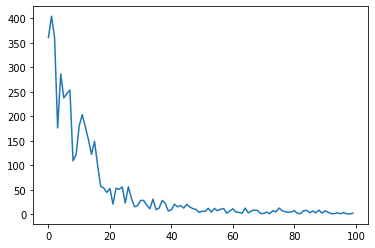

In [78]:
batch_size = 100
loss_values = []
X_train = torch.tensor(dataset[['X_1', 'X_2']].to_numpy(), dtype=torch.float32)
y_train = torch.tensor(dataset[['Crate_Count']].to_numpy(), dtype=torch.float32)
for idx in range(100):
    shuffled_indices = torch.randperm(X_train.shape[0])
    
    for idx in range(0, X_train.shape[0], batch_size):
        batch_indices = shuffled_indices[idx : idx + batch_size]
        predictors = X_train[batch_indices]
        ground_truth = y_train[batch_indices]
        
        optimizer.zero_grad() # Zero out gradients for all the parameters in our model

        prediction = my_model(predictors)
        loss_value = loss_function(prediction, ground_truth)

        loss_value.backward() # Calculate the gradients
        optimizer.step() # Update the model parameters
    
    with torch.no_grad():
        updated_loss_value = loss_function(my_model(predictors), ground_truth) # Calculate updated loss value
        loss_values.append(updated_loss_value)
        
plt.plot(np.arange(100), loss_values)

Check the $R^2$ of the linear model.

In [79]:
sklearn.metrics.r2_score(dataset['Crate_Count'], my_model(X_train).detach())

0.9938615011546952

**Try it out**  
1. Try to change the number of neurons and see visualize the difference in our model approximation
2. Try to approximate a different target function
3. Ask questions!

## Completion
Congratulations on completing this lab session.  
With the knowledge and intuition gained from this lab session we are ready to move on to our challenge!